In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare

import glob

path = r'/Users/macbook/Desktop/PANCAN-CLINICAL/dataset_preprocessed' # use your path
all_files = glob.glob(path + "/*.csv")

for i in all_files:
    df0=pd.read_csv(i)
    #df0.describe(include='all')
    df0=df0.replace(to_replace='[Unknown]', value='Unknown', regex=False)
    df0=df0.replace(to_replace='[NA]', value='Unknown', regex=False)
    df0=df0.replace(to_replace='[Not Evaluated]', value='Unknown', regex=False)

    #removing features with 'unknown' entries > 50% of data
    df0=df0.drop(df0.columns[df0.apply(lambda col:(col=='Unknown').sum()>(0.5*df0.shape[0]))], axis=1)
    df0.to_csv('/Users/macbook/Desktop/PANCAN-CLINICAL/dataset_reduced/'+i.split('/')[6],index=False)
    #os_cutoff=df0['OS.time'].median()

In [16]:
cancer='LUAD'
df0=pd.read_csv('/Users/macbook/Desktop/PANCAN-CLINICAL/dataset_reduced/'+str(cancer)+'-clinical.csv')
os_cutoff=df0['OS.time'].median()

## handling string factors

In [17]:
def prob_HR_str(df,factor,subclass_list,cutoff):
    
    k=0
    for i in range(len(subclass_list)):
        g=df[factor]==subclass_list[i]
        k=k|g
    
    
    df_temp=df[k]
    c=df_temp.shape[0]
    df_temp=df_temp[df_temp['OS.time']<cutoff]
    
    r=df_temp.shape[0]
    print(str(r)+'/'+str(c))

    #print(c)

    p=df_temp.shape[0]/c
    
    #return df_temp[str(factor)].value_counts()
    return r,p

In [5]:
#prob_HR_str(df0,'gender',['FEMALE'],os_cutoff)

## handling numeric factors

In [39]:
def prob_HR_num(df,factor,bin_size,cutoff):
    
    df=df[df[str(factor)]!='Unknown']
    df[str(factor)] = pd.to_numeric(df[str(factor)])
    
    ind=pd.qcut(df[str(factor)],bin_size,labels=False)
    q=(pd.qcut(df[str(factor)],bin_size,retbins=True)[1])
    print(q)
    r=[]
    p=[]
    for j in range(bin_size):
        df_temp=df.loc[(df[str(factor)][ind==j].index)]
        c=df_temp.shape[0]
        df_temp=df_temp[df_temp['OS.time']<cutoff]
        r.append(df_temp.shape[0])
        p.append(df_temp.shape[0]/c)
        print(str(df_temp.shape[0])+'/'+str(c))
        #print(c)
    
    #return df_temp[str(factor)].value_counts()
    return r,q,p

## chi-square test

In [24]:
k=2
dg=pd.DataFrame()
h=[]
chi=1
hh=1
while (k!=df0.shape[1]-1):
    factor = df0.columns[k]#input("Enter clinical factor:")
    print("\n",factor.upper())
    accept= input("Proceed (y) or skip (n) or END (q)?:")
    
    if accept=='y':
        strORnum= input("Is the factor numeric (y/n)?:")
        dg[str(factor)]=10*[0]
        dg['N_HR'+str(k)]=10*[0]
        
        if (str(factor)==''):
            break

        if (str(strORnum)=='y'):
            print(df0[str(factor)].describe())
            b=input("enter n_bins:")
            r,q,p=prob_HR_num(df0,str(factor),int(b),os_cutoff)
            chi=chisquare(r)[1]
            print(str(factor),'chi-sq p value:',chi)
            dg[str(factor)]=list(q)+(10-len(q))*[0]
            dg['N_HR'+str(k)]=r+(10-len(r))*[0]
            dg.iloc[9,hh]=chi
            
        elif (str(strORnum)=='n'):
            print(df0[str(factor)].value_counts())
            k2=0
            l=[]
            ll=[]
            while k2!=1:
                subclass_list=input("enter features to be clubbed (separated by semi-colon):")
                print(factor,subclass_list,os_cutoff)


                if (subclass_list==''):
                    break
                else :
                    ll.append(str(subclass_list))
                    subclass_list=subclass_list.split(";")
                    r1,p1=prob_HR_str(df0,str(factor),subclass_list,os_cutoff)
                    l.append(r1)

                #k2=1
            chi=chisquare(l)[1]
            dg[str(factor)]=list(ll)+(10-len(ll))*[0]
            dg['N_HR'+str(k)]=l+(10-len(l))*[0]
            dg.iloc[9,hh]=chi

            print(str(factor),'chi-sq p value:',chi)  
        else:
            break    
        #subset=input("want to add this factor to subset?(y/n):")
        if (chi<0.05):
            h.append(factor)
        
        hh=hh+2
        
    elif accept=='q':
        break
    
    k=k+1






 FORM_COMPLETION_DATE
Proceed (y) or skip (n) or END (q)?:n

 HISTOLOGIC_DIAGNOSIS
Proceed (y) or skip (n) or END (q)?:n

 PROSPECTIVE_COLLECTION
Proceed (y) or skip (n) or END (q)?:n

 RETROSPECTIVE_COLLECTION
Proceed (y) or skip (n) or END (q)?:n

 GENDER
Proceed (y) or skip (n) or END (q)?:y
Is the factor numeric (y/n)?:n
FEMALE    270
MALE      233
Name: gender, dtype: int64
enter features to be clubbed (separated by semi-colon):MALE
gender MALE 230.0
120/233
enter features to be clubbed (separated by semi-colon):FEMALE
gender FEMALE 230.0
131/270
enter features to be clubbed (separated by semi-colon):
gender  230.0
gender chi-sq p value: 0.4874854113009054

 SUBMITTED_TUMOR_SITE
Proceed (y) or skip (n) or END (q)?:n

 RACE
Proceed (y) or skip (n) or END (q)?:n

 ETHNICITY
Proceed (y) or skip (n) or END (q)?:n

 HISTORY_OTHER_MALIGNANCY
Proceed (y) or skip (n) or END (q)?:n

 ANATOMIC_ORGAN_SUBDIVISION
Proceed (y) or skip (n) or END (q)?:n

 HISTOLOGIC_DIAGNOSIS.1
Proceed (y) or s

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[1.5000e-01 2.2375e+01 4.0000e+01 5.2000e+01 1.5400e+02]
41/86
56/117
26/57
42/84
tobacco_smoking_pack_years_smoked chi-sq p value: 0.012125710438236872

 VITAL_STATUS
Proceed (y) or skip (n) or END (q)?:y
Is the factor numeric (y/n)?:n
0    380
1    123
Name: vital_status, dtype: int64
enter features to be clubbed (separated by semi-colon):


/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:5037: RuntimeWarning: Mean of empty slice.
  f_exp = np.atleast_1d(f_obs.mean(axis=axis))


vital_status  230.0
vital_status chi-sq p value: nan

 TUMOR_STATUS
Proceed (y) or skip (n) or END (q)?:y
Is the factor numeric (y/n)?:n
TUMOR FREE    301
WITH TUMOR    106
Unknown        96
Name: tumor_status, dtype: int64
enter features to be clubbed (separated by semi-colon):TUMOR FREE
tumor_status TUMOR FREE 230.0
177/301
enter features to be clubbed (separated by semi-colon):WITH TUMOR
tumor_status WITH TUMOR 230.0
33/106
enter features to be clubbed (separated by semi-colon):
tumor_status  230.0
tumor_status chi-sq p value: 2.875121147800507e-23

 BIRTH_DAYS_TO
Proceed (y) or skip (n) or END (q)?:q


In [44]:
#chi square matrix to file
dg.to_csv('/Users/macbook/Desktop/PANCAN-CLINICAL/chisquare/'+str(cancer)+'-chi-sq.csv',index=False)

In [63]:
# h contains names of all features relevant from chi-sq test

dh=df0[h+['bcr_patient_barcode','OS.time','vital_status']]

num_f=['tobacco_smoking_pack_years_smoked']   #enter names of significant numerical features in this list from chisq result

In [32]:
#making prob matrix dh using chisq results for categorical variables only 

for i in range(dh.shape[1]-3):
    cfactor=dh.columns[i]
    
    if (dg[cfactor].dtype!='float64'): #not a numeric column
        w=list(set(dg[cfactor])-set([0]))

        for j in range(len(w)):
            x=str(w[j]).split(";")

            if (len(x)==1):
                print(w[j])
                dummy,prob=prob_HR_str(df0,cfactor,x,os_cutoff)
                dh[cfactor]= dh[cfactor].replace(w[j], prob) 

                
                print(prob)
            else:
                dummy,prob=prob_HR_str(df0,cfactor,x,os_cutoff)
                print(prob)
                for j2 in range(len(x)):
                    dh[cfactor]= dh[cfactor].replace(x[j2], prob) 
                    print(x[j2])
        #print(w)
    else:
        w=list(set(dg[cfactor])-set([0]))
        
# for numerical variables only
for t in num_f:
    v1,v2,v3=prob_HR_num(dh,str(t),4,os_cutoff)
    for r in range(dq.shape[0]):
        s=dh[str(t)][r]

        if (s!='Unknown'): 
            z=0
            while (z!=len(v2)-1):
                if (float(s)>=v2[z] and float(s)<v2[z+1]):
                    dh[str(t)][r]=v3[z]
                z=z+1


        

7/17
0.4117647058823529
R1
R2
R0
158/330
0.47878787878787876
32/64
0.5
T3
T4
217/436
0.49770642201834864


/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


T1
T1a
T1b
T2
T2a
T2b
N0
172/323
0.5325077399380805
73/168
0.43452380952380953
N1
N2
N3
M0
143/334
0.4281437125748503
11/25
0.44
M1
M1a
M1b
200/388
0.5154639175257731
Stage IA
Stage IB
Stage I
Stage II
Stage IIA
Stage IIB
47/107
0.4392523364485981
Stage IIIA
Stage IIIB
Stage IV
NO
57/92
0.6195652173913043
YES
139/247
0.562753036437247
NO
122/248
0.49193548387096775
YES
35/62
0.5645161290322581
NO
87/192
0.453125
YES
48/80
0.6
Yes
2/3
0.6666666666666666
No
248/498
0.4979919678714859
WITH TUMOR
33/106
0.3113207547169811
TUMOR FREE
177/301
0.5880398671096345


In [ ]:
dh #check final pmatrix here

In [67]:
# write pmatrix to file then replace strings like 'NX,TX,Unknown' with '0.5' in excel
dh.to_csv('/Users/macbook/Desktop/PANCAN-CLINICAL/pmatrix/'+str(cancer)+'-pmatrix.csv',index=False)

# DECISION TREE based classification using h from above

In [69]:
# here we will use the relevant features found from chi-sq test above (stored in h)
#therafter we will use recursive feature elimination
# then we will use gridsearchCV for best parameters
#five fold prediction of classes to form a overall predicted array for survival analysis further


df=df0[['bcr_patient_barcode']+h+['OS.time','vital_status']]

In [72]:
df

,bcr_patient_barcode,residual_tumor,ajcc_tumor_pathologic_pt,ajcc_nodes_pathologic_pn,ajcc_metastasis_pathologic_pm,ajcc_pathologic_tumor_stage,pulmonary_function_test_indicator,kras_gene_analysis_indicator,egfr_mutation_status,history_neoadjuvant_treatment,tobacco_smoking_pack_years_smoked,tumor_status,OS.time,vital_status
0,TCGA-05-4244,RX,T2,N2,M1,Stage IV,Unknown,Unknown,Unknown,No,38,TUMOR FREE,High Risk,0
1,TCGA-05-4245,R2,T2,N2,M0,Stage IIIA,Unknown,Unknown,Unknown,No,32,TUMOR FREE,Low Risk,0
2,TCGA-05-4249,R0,T2,N0,M0,Stage IB,Unknown,Unknown,Unknown,No,52,TUMOR FREE,Low Risk,0
3,TCGA-05-4250,R2,T3,N1,M0,Stage IIIA,Unknown,Unknown,Unknown,No,47,Unknown,High Risk,1
4,TCGA-05-4382,R0,T2,N0,M0,Stage IB,Unknown,Unknown,Unknown,No,62,TUMOR FREE,Low Risk,0
5,TCGA-05-4384,RX,T2,N2,M0,Stage IIIA,Unknown,Unknown,Unknown,No,20,Unknown,Low Risk,0
6,TCGA-05-4389,R0,T1,N0,M0,Stage IA,Unknown,Unknown,Unknown,No,43,TUMOR FREE,Low Risk,0
7,TCGA-05-4390,R0,T2,N0,M0,Stage IB,Unknown,Unknown,Unknown,No,15,TUMOR FREE,Low Risk,0
8,TCGA-05-4395,R0,T4,N2,M0,Stage IIIB,Unknown,Unknown,Unknown,No,Unknown,TUMOR FREE,High Risk,1
9,TCGA-05-4396,R0,T4,N1,M0,Stage IIIB,Unknown,Unknown,Unknown,No,19,Unknown,Low Risk,1


In [71]:
df.loc[(df['OS.time']>df0['OS.time'].median()), 'OS.time'] = 'Low Risk'
df.loc[(df['OS.time']!='Low Risk'), 'OS.time'] = 'High Risk'

/Users/macbook/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [73]:
#only categorical variables here
cat_vars=list(set(df.columns)-set(['bcr_patient_barcode','OS.time','tobacco_smoking_pack_years_smoked','vital_status']))


In [74]:
#encoding cat vars
df_dummies=pd.get_dummies(df,columns=cat_vars)

In [75]:
for f in df_dummies.columns:
    print(f)

bcr_patient_barcode
tobacco_smoking_pack_years_smoked
OS.time
vital_status
kras_gene_analysis_indicator_NO
kras_gene_analysis_indicator_Unknown
kras_gene_analysis_indicator_YES
ajcc_tumor_pathologic_pt_T1
ajcc_tumor_pathologic_pt_T1a
ajcc_tumor_pathologic_pt_T1b
ajcc_tumor_pathologic_pt_T2
ajcc_tumor_pathologic_pt_T2a
ajcc_tumor_pathologic_pt_T2b
ajcc_tumor_pathologic_pt_T3
ajcc_tumor_pathologic_pt_T4
ajcc_tumor_pathologic_pt_TX
residual_tumor_R0
residual_tumor_R1
residual_tumor_R2
residual_tumor_RX
residual_tumor_Unknown
ajcc_metastasis_pathologic_pm_M0
ajcc_metastasis_pathologic_pm_M1
ajcc_metastasis_pathologic_pm_M1a
ajcc_metastasis_pathologic_pm_M1b
ajcc_metastasis_pathologic_pm_MX
ajcc_metastasis_pathologic_pm_Unknown
egfr_mutation_status_NO
egfr_mutation_status_Unknown
egfr_mutation_status_YES
history_neoadjuvant_treatment_No
history_neoadjuvant_treatment_Unknown
history_neoadjuvant_treatment_Yes
ajcc_pathologic_tumor_stage_Stage I
ajcc_pathologic_tumor_stage_Stage IA
ajcc_pathol

In [ ]:
#removing unwanted columns such as 'Unknown','Indeterminate','NX' etc.
#df_dummies.drop(list(df_dummies.filter(regex = 'Stage X')), axis = 1, inplace = True)

In [76]:
df_dummies.loc[(df_dummies['OS.time']=='Low Risk'), 'OS.time'] =  0
df_dummies.loc[(df_dummies['OS.time']=='High Risk'), 'OS.time'] =  1

In [77]:
#removing samples with 'Unknown' in numerical features
for t in num_f:

    df_dummies=df_dummies[df_dummies[str(t)]!='Unknown']

In [78]:
df_dummies

,bcr_patient_barcode,tobacco_smoking_pack_years_smoked,OS.time,vital_status,kras_gene_analysis_indicator_NO,kras_gene_analysis_indicator_Unknown,kras_gene_analysis_indicator_YES,ajcc_tumor_pathologic_pt_T1,ajcc_tumor_pathologic_pt_T1a,ajcc_tumor_pathologic_pt_T1b,...,tumor_status_WITH TUMOR,pulmonary_function_test_indicator_NO,pulmonary_function_test_indicator_Unknown,pulmonary_function_test_indicator_YES,ajcc_nodes_pathologic_pn_N0,ajcc_nodes_pathologic_pn_N1,ajcc_nodes_pathologic_pn_N2,ajcc_nodes_pathologic_pn_N3,ajcc_nodes_pathologic_pn_NX,ajcc_nodes_pathologic_pn_Unknown
0,TCGA-05-4244,38,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,TCGA-05-4245,32,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,TCGA-05-4249,52,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,TCGA-05-4250,47,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,TCGA-05-4382,62,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5,TCGA-05-4384,20,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6,TCGA-05-4389,43,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
7,TCGA-05-4390,15,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,TCGA-05-4396,19,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10,TCGA-05-4397,45,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [79]:
labels=df_dummies[['OS.time']]
features=df_dummies.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)

In [111]:
# finding best parameters using gridsearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

pipe_steps=[('scaler',StandardScaler()),('decsT',DecisionTreeClassifier())]

check_params={'decsT__criterion':['gini','entropy'],
             'decsT__max_depth':np.arange(3,30)}

pipeline=Pipeline(pipe_steps)
print(pipeline)

import warnings
warnings.filterwarnings("ignore")

cv=5

create_grid=GridSearchCV(pipeline,param_grid=check_params,cv=cv)
create_grid.fit(features,labels)

#print("score for %d fold CV:=%3.2f" %(cv,create_grid.score(X_test,y_test)))
#print("best params")
print(create_grid.best_params_)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decsT',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)
{'decsT__criterion': 'gini', 'decsT__max_depth': 5}


In [114]:
#feature selection using recursive feature elimination
from sklearn.feature_selection import RFECV

#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)

estimator = DecisionTreeClassifier(criterion='gini',max_depth=5)
selector = RFECV(estimator, step=1, cv=5)

selector = selector.fit(features, labels)

selector.support_
#array([ True,  True,  True,  True,  True, False, False, False, False,
#       False])
selector.ranking_
#array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

array([ 1,  1, 10, 11,  1,  1,  9,  1, 13, 15, 25, 17, 19, 21, 32, 34, 24,
       23,  1, 27, 29, 35,  1, 39, 41, 42, 40, 38, 22, 20, 18, 16, 14, 12,
        1,  8,  7,  6,  5, 26,  1,  4,  2,  1,  3, 28, 30, 31, 33, 36, 37,
       43])

In [122]:
# f has the RFE selected features
f=[]
for jk in np.where(selector.ranking_==1)[0]:
    f.append(features.columns[jk])

In [123]:
f

['tobacco_smoking_pack_years_smoked',
 'kras_gene_analysis_indicator_NO',
 'ajcc_tumor_pathologic_pt_T1',
 'ajcc_tumor_pathologic_pt_T1a',
 'ajcc_tumor_pathologic_pt_T2',
 'ajcc_metastasis_pathologic_pm_M0',
 'ajcc_metastasis_pathologic_pm_MX',
 'ajcc_pathologic_tumor_stage_Stage IIA',
 'tumor_status_TUMOR FREE',
 'pulmonary_function_test_indicator_NO']

In [127]:
df_dummies2=df_dummies[(f)+['OS.time','bcr_patient_barcode','vital_status']]

In [129]:
# 5 train and test sets for five-fold CV
xx=np.array_split(df_dummies2, 5)

#for equal distribution of labels
#xx=np.array_split(df_dummies2[df_dummies2['OS.time']==0])
#xy=np.array_split(df_dummies2[df_dummies2['OS.time']==1])
#set1,set2,set3,set4,set5=pd.concat([xx[0],xy[0]],pd.concat([xx[1],xy[1]]),pd.concat([xx[2],xy[2]]),pd.concat([xx[3],xy[3]]),pd.concat([xx[4],xy[4]])



set1,set2,set3,set4,set5=xx[0],xx[1],xx[2],xx[3],xx[4]

# train and test 1 : set2,3,4,5 vs set1
case1=pd.concat([set2,set3,set4,set5])
xtrain1=case1.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytrain1=case1[['OS.time']]

xtest1=set1.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytest1=set1[['OS.time']]

# # train and test 1 : set1,3,4,5 vs set2
case2=pd.concat([set1,set3,set4,set5])
xtrain2=case2.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytrain2=case2[['OS.time']]

xtest2=set2.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytest2=set2[['OS.time']]

# # train and test 1 : set1,2,4,5 vs set3
case3=pd.concat([set1,set2,set4,set5])
xtrain3=case3.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytrain3=case3[['OS.time']]

xtest3=set3.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytest3=set3[['OS.time']]

# # train and test 1 : set1,2,3,5 vs set4
case4=pd.concat([set1,set2,set3,set5])
xtrain4=case4.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytrain4=case4[['OS.time']]

xtest4=set4.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytest4=set4[['OS.time']]

# # train and test 1 : set1,2,3,4 vs set5
case5=pd.concat([set1,set2,set3,set4])
xtrain5=case5.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytrain5=case5[['OS.time']]

xtest5=set5.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)
ytest5=set5[['OS.time']]

In [130]:
labels2=df_dummies2[['OS.time']]
features2=df_dummies2.drop(['OS.time','bcr_patient_barcode','vital_status'],axis=1)

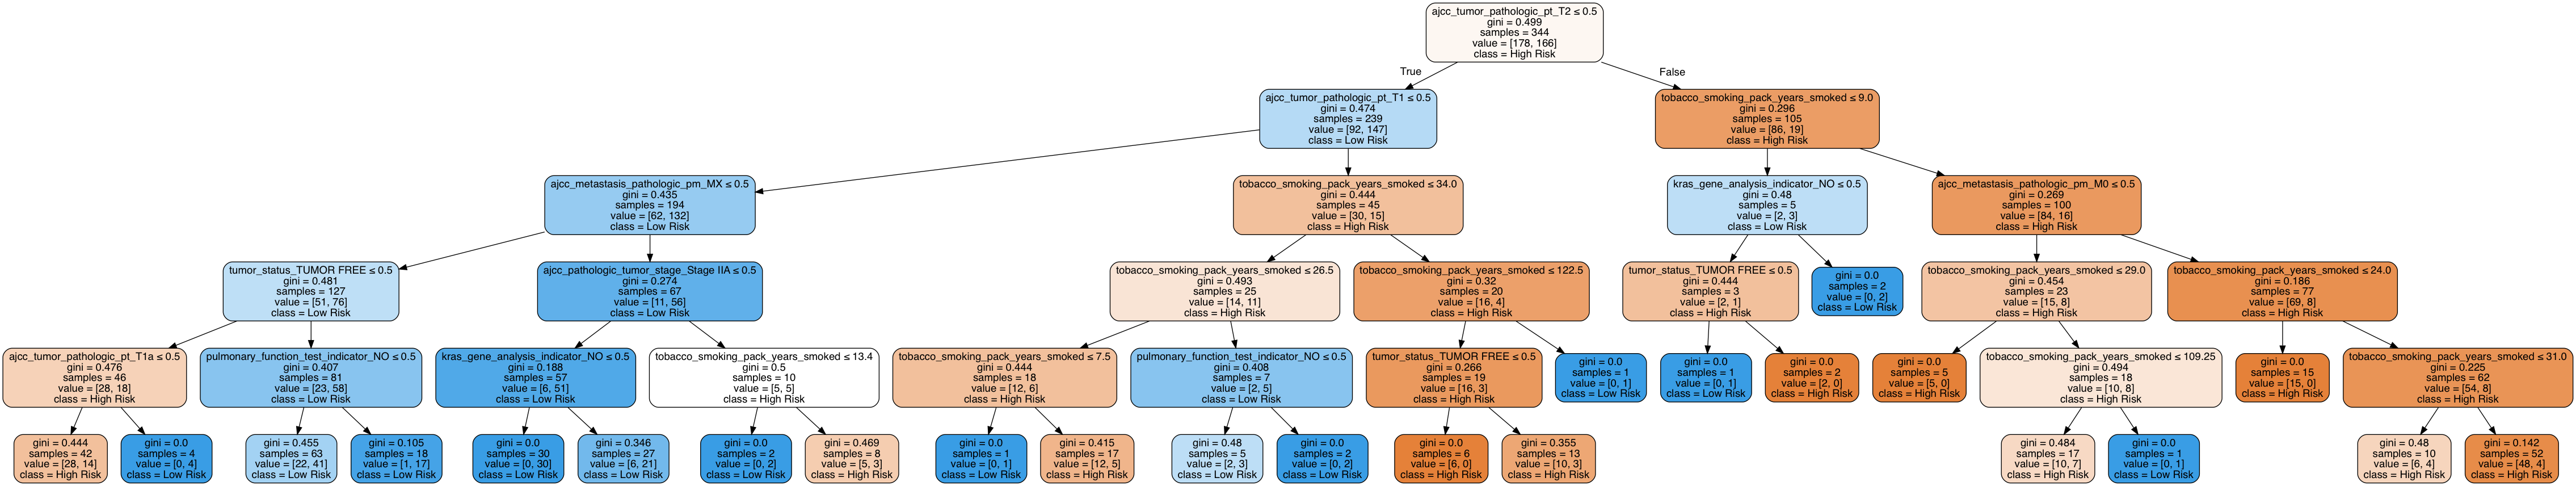

In [132]:
#fit the train data (based on best params) and create a decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

DecsTree=DecisionTreeClassifier(criterion='gini',max_depth=5)
DecsTree.fit(features2,labels2)

dot_data=StringIO()

export_graphviz(DecsTree, out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=features2.columns,class_names=['High Risk','Low Risk'])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+str(cancer)+'_decs_tree.png',)
Image(graph.create_png())

In [133]:
DecsTree.fit(xtrain1,ytrain1)
pred_train1=DecsTree.predict_proba(xtrain1)[:,1]
actual_train1=np.asarray(ytrain1.iloc[:,0])
pred_test1=DecsTree.predict_proba(xtest1)[:,1]
actual_test1=np.asarray(ytest1.iloc[:,0])

DecsTree.fit(xtrain2,ytrain2)
pred_train2=DecsTree.predict_proba(xtrain2)[:,1]
actual_train2=np.asarray(ytrain2.iloc[:,0])
pred_test2=DecsTree.predict_proba(xtest2)[:,1]
actual_test2=np.asarray(ytest2.iloc[:,0])

DecsTree.fit(xtrain3,ytrain3)
pred_train3=DecsTree.predict_proba(xtrain3)[:,1]
actual_train3=np.asarray(ytrain3.iloc[:,0])
pred_test3=DecsTree.predict_proba(xtest3)[:,1]
actual_test3=np.asarray(ytest3.iloc[:,0])

DecsTree.fit(xtrain4,ytrain4)
pred_train4=DecsTree.predict_proba(xtrain4)[:,1]
actual_train4=np.asarray(ytrain4.iloc[:,0])
pred_test4=DecsTree.predict_proba(xtest4)[:,1]
actual_test4=np.asarray(ytest4.iloc[:,0])

DecsTree.fit(xtrain5,ytrain5)
pred_train5=DecsTree.predict_proba(xtrain5)[:,1]
actual_train5=np.asarray(ytrain5.iloc[:,0])
pred_test5=DecsTree.predict_proba(xtest5)[:,1]
actual_test5=np.asarray(ytest5.iloc[:,0])

In [134]:
#low risk=0,high risk=1
def accuracy_decision(actual, pred, out,name,label):
    y_hat= pred#list(np.loadtxt(pred, delimiter=','))#output file--3
    y_actual= actual#list(np.loadtxt(actual, delimiter=','))#output file--3
    result1= open(out,'a', newline='')#output file--3
    with result1:
        writer1=csv.writer(result1);
        #writer1.writerow([name])
        writer1.writerow([name,'Threshold','TP', 'FP', 'TN', 'FN','sens','spec','acc','auroc','mcc','FPR']);
        for thr in np.arange(0, 1.1, 0.1):
            TP,FP,TN,FN,spec,mcc,sens,acc,i = 0,0,0,0,0,0,0,0,0
            #print (len(y_hat),len(y_actual))
            while i < len(y_hat):
                if y_actual[i]== 1 and y_hat[i] >= thr:
                    TP += 1
                elif y_actual[i]== 0 and y_hat[i] >= thr:
                    FP += 1
                elif y_actual[i] == 0 and y_hat[i] < thr:
                    TN += 1
                elif y_actual[i]== 1 and y_hat[i] < thr:
                    FN += 1
                i += 1          
            binder=TP+FN
            nonb=TN+FP
            total=TP+TN+FP+FN
            if binder!=0:
                sens=(TP/binder)*100
            else:
                sens == 0
            if nonb!=0:
                spec=TN/(nonb)*100
            else:
                spec == 0
            acc=((TP+TN)/total)*100
            FPR=100 - spec
            auc1=roc_auc_score(y_actual, y_hat)
            if ((TP+FN)*(TP+FP)*(FN+FP)*(TN+FN)) != 0:
                mcc=(TP*TN-FP*FN)/((TN+FN)*(TP+FN)*(TN+FP)*(TP+FP))**0.5
            else:
                mcc=0
            writer1=csv.writer(result1);
            writer1.writerow([label,thr,TP, FP, TN, FN,sens,spec,acc,auc1,mcc,FPR]);

In [135]:
import csv
from sklearn.metrics import roc_auc_score

accuracy_decision(actual_train1,pred_train1,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'train_'+str(cancer)+'.csv','train','train1')
accuracy_decision(actual_test1,pred_test1,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'test_'+str(cancer)+'.csv','test','test1')

accuracy_decision(actual_train2,pred_train2,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'train_'+str(cancer)+'.csv','train','train2')
accuracy_decision(actual_test2,pred_test2,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'test_'+str(cancer)+'.csv','test','test2')

accuracy_decision(actual_train3,pred_train3,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'train_'+str(cancer)+'.csv','train','train3')
accuracy_decision(actual_test3,pred_test3,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'test_'+str(cancer)+'.csv','test','test3')

accuracy_decision(actual_train4,pred_train4,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'train_'+str(cancer)+'.csv','train','train4')
accuracy_decision(actual_test4,pred_test4,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'test_'+str(cancer)+'.csv','test','test4')

accuracy_decision(actual_train5,pred_train5,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'train_'+str(cancer)+'.csv','train','train5')
accuracy_decision(actual_test5,pred_test5,'/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/'+'test_'+str(cancer)+'.csv','test','test5')



In [141]:
#choose selected_thr (prob of high risk) by analyzing csv files

selected_thr=0.5

pred_test1_labels=1*(pred_test1>selected_thr)
pred_test2_labels=1*(pred_test2>selected_thr)
pred_test3_labels=1*(pred_test3>selected_thr)
pred_test4_labels=1*(pred_test4>selected_thr)
pred_test5_labels=1*(pred_test5>selected_thr)



In [143]:
#appending predicted labels to the dataset
df_dummies2['risk']=list(pred_test1_labels)+list(pred_test2_labels)+list(pred_test3_labels)+list(pred_test4_labels)+list(pred_test5_labels)

In [147]:
out1=df_dummies2.drop(['OS.time'],axis=1)
out2=df0[['bcr_patient_barcode']+h+['OS.time','vital_status']]

out=pd.merge(out1, out2, on="bcr_patient_barcode")

out_final=out[['bcr_patient_barcode','OS.time','vital_status_x','risk']]

In [ ]:
out_final.to_csv('/Users/macbook/Desktop/PANCAN-CLINICAL/ML_results/predicted_'+str(cancer),index=None)

In [1]:
751+458+194

1403